In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
py.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


In [2]:

training_set = pd.read_excel("../input/flight-fare-prediction-mh/Data_Train.xlsx")
test_set = pd.read_excel("../input/flight-fare-prediction-mh/Test_set.xlsx")


In [3]:
training_set.head() 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
training_set.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
training_set.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
training_set = training_set.dropna()
#data_train = data_train.dropna()
#data_train.shape

In [7]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [8]:
test_set.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

## converting the data type to date-time format 

In [9]:
training_set.shape

(10682, 11)

In [10]:
training_set.isna().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
dtype: bool

In [11]:
training_set['Journey_Day'] = pd.to_datetime(training_set.Date_of_Journey, format='%d/%m/%Y').dt.day
training_set['Journey_Month'] = pd.to_datetime(training_set.Date_of_Journey, format='%d/%m/%Y').dt.month
training_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [12]:
# Test Set
test_set['Journey_Day'] = pd.to_datetime(test_set.Date_of_Journey, format='%d/%m/%Y').dt.day
test_set['Journey_Month'] = pd.to_datetime(test_set.Date_of_Journey, format='%d/%m/%Y').dt.month
test_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [13]:
training_set.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)
test_set.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

In [14]:
training_set['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
32h 55m      1
47h          1
41h 20m      1
4h 10m       1
33h 20m      1
Name: Duration, Length: 368, dtype: int64

## Convert Duration column to numeric type

In [15]:
duration = list(training_set['Duration'])


for i in range(len(duration)) :
    if len(duration[i].split()) != 2: 
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1])) #for examole if duration is 49 mintutes 4 sec then it will reflect like 
    dur_minutes.append(int(duration[i].split()[1][:-1]))#0:49:4 and if 2 hours 10 seconds then it will reflect like 2:0:10
    
training_set['Duration_hours'] = dur_hours
training_set['Duration_minutes'] =dur_minutes

training_set.drop(labels = 'Duration', axis = 1, inplace = True) # dropping the original duration column from training set


In [16]:
duration = list(test_set['Duration'])


for i in range(len(duration)) :
    if len(duration[i].split()) != 2: 
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1])) #for examole if duration is 49 mintutes 4 sec then it will reflect like 
    dur_minutes.append(int(duration[i].split()[1][:-1]))#0:49:4 and if 2 hours 10 seconds then it will reflect like 2:0:10
    
test_set['Duration_hours'] = dur_hours
test_set['Duration_minutes'] =dur_minutes

test_set.drop(labels = 'Duration', axis = 1, inplace = True) # dropping the original duration column from training set


In [17]:
#Converting 'Dep_Time' to 'Depart_Time_hour' and 'Depart_time_Minutes'
training_set['Dep_hour'] = pd.to_datetime(training_set['Dep_Time']).dt.hour
training_set['Dep_min'] = pd.to_datetime(training_set['Dep_Time']).dt.minute
training_set.drop(labels='Dep_Time', axis = 1, inplace= True)

In [18]:
#test_set
#Converting 'Dep_Time' to 'Depart_Time_hour' and 'Depart_time_Minutes'
test_set['Dep_hour'] = pd.to_datetime(test_set['Dep_Time']).dt.hour
test_set['Dep_min'] = pd.to_datetime(test_set['Dep_Time']).dt.minute
test_set.drop(labels='Dep_Time', axis = 1, inplace= True)

In [19]:
#Converting 'Arrival_Time' to 'Arrival_Time_hour' and 'Arrival_time_Minutes'
training_set['Arrival_hour'] = pd.to_datetime(training_set['Arrival_Time']).dt.hour
training_set['Arrival_min'] = pd.to_datetime(training_set['Arrival_Time']).dt.minute
training_set.drop(labels='Arrival_Time', axis = 1, inplace= True)
training_set.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,4,45,16,50,21,35


In [20]:
#test_set
#Converting 'Arrival_Time' to 'Arrival_Time_hour' and 'Arrival_time_Minutes'
test_set['Arrival_hour'] = pd.to_datetime(test_set['Arrival_Time']).dt.hour
test_set['Arrival_min'] = pd.to_datetime(test_set['Arrival_Time']).dt.minute
test_set.drop(labels='Arrival_Time', axis = 1, inplace= True)
test_set.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2,50,23,55,2,45


In [21]:
training_set['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [22]:
labels = (training_set.Airline.unique())
values = training_set.Airline.value_counts()

trace = go.Pie(labels=labels, values=values)

iplot([trace])

In [23]:
import plotly.express as px
#df = px.data.training_data()
fig = px.box(training_set, x="Airline", y="Price", color="Airline", notched=True)
fig.show()

In [24]:
# Convert Categorical data to Numeric using one-hot encoding as Airline is nominal data
Airline = training_set[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [25]:
training_set['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [26]:
fig = px.box(training_set, x="Source", y="Price", color="Source", notched=True)
fig.show()

In [27]:
Source = training_set[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [28]:
training_set['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [29]:
fig = px.box(training_set, x="Destination", y="Price", color="Destination", notched=True)
fig.show()

In [30]:
Destination = training_set[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first= True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [31]:
training_set['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BLR → HBX → BOM → AMD → DEL       1
BOM → JDH → JAI → DEL → HYD       1
CCU → IXA → BLR                   1
BLR → HBX → BOM → BHO → DEL       1
BLR → BOM → IXC → DEL             1
Name: Route, Length: 128, dtype: int64

In [32]:
training_set["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

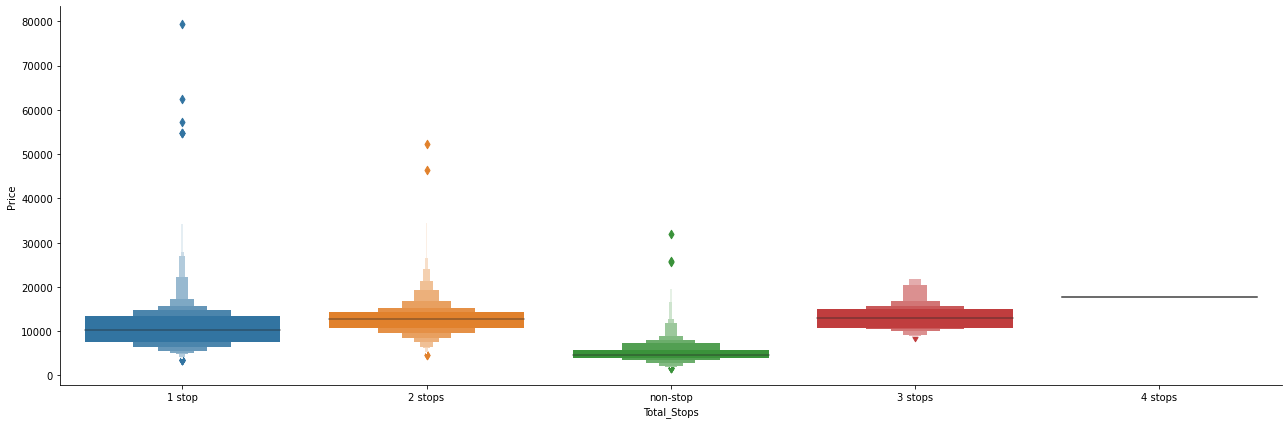

In [33]:
sns.catplot(y = "Price", x = "Total_Stops", data = training_set.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [34]:
#
training_set.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [35]:

training_set.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,4,45,16,50,21,35


In [36]:
fig = px.box(training_set, x="Journey_Month", y="Price", color="Journey_Month")
fig.show()

In [37]:
data_train = pd.concat([training_set, Airline, Source, Destination], axis=1)

In [38]:
data_train.isna().any()

Airline                                      False
Source                                       False
Destination                                  False
Route                                        False
Total_Stops                                  False
Additional_Info                              False
Price                                        False
Journey_Day                                  False
Journey_Month                                False
Duration_hours                               False
Duration_minutes                             False
Dep_hour                                     False
Dep_min                                      False
Arrival_hour                                 False
Arrival_min                                  False
Airline_Air India                            False
Airline_GoAir                                False
Airline_IndiGo                               False
Airline_Jet Airways                          False
Airline_Jet Airways Business   

In [39]:
data_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,2,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,7,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,19,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,4,...,0,0,0,0,0,0,0,0,0,1


In [40]:
data_train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [41]:
data_train.drop(["Airline", "Source", "Destination", "Route", "Additional_Info"], axis=1, inplace = True)

In [42]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month',
       'Duration_hours', 'Duration_minutes', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [43]:
# Categorical data to Numeric for test_set

print(test_set["Airline"].value_counts())
Airline = pd.get_dummies(test_set["Airline"], drop_first= True)

print()

print(test_set["Source"].value_counts())
Source = pd.get_dummies(test_set["Source"], drop_first= True)

print()

print(test_set["Destination"].value_counts())
Destination = pd.get_dummies(test_set["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_set.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_set.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_set, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data_test.head()


Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


,Total_Stops,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,10,55,17,30,4,25,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,4,0,6,20,10,20,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,23,45,19,15,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,13,0,8,0,21,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2,50,23,55,2,45,0,...,0,0,0,0,0,0,1,0,0,0


In [44]:
data_test.shape

(2671, 28)

In [45]:
data_test.columns

Index(['Total_Stops', 'Journey_Day', 'Journey_Month', 'Duration_hours',
       'Duration_minutes', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [46]:
data_train.shape

(10682, 30)

In [47]:
data_train.isna().any()

Total_Stops                                  False
Price                                        False
Journey_Day                                  False
Journey_Month                                False
Duration_hours                               False
Duration_minutes                             False
Dep_hour                                     False
Dep_min                                      False
Arrival_hour                                 False
Arrival_min                                  False
Airline_Air India                            False
Airline_GoAir                                False
Airline_IndiGo                               False
Airline_Jet Airways                          False
Airline_Jet Airways Business                 False
Airline_Multiple carriers                    False
Airline_Multiple carriers Premium economy    False
Airline_SpiceJet                             False
Airline_Trujet                               False
Airline_Vistara                

In [48]:
null_in_total_stops = data_train[data_train['Total_Stops'].isnull()]
null_in_total_stops

,Total_Stops,Price,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi


In [49]:
#delete_row = data_train[data_train['Total_Stops'].isnull()].index
#print(delete_row)
#data_train = data_train.drop(delete_row)

In [50]:
#Checking for null values
print(data_train.isnull().values.any())

False


In [51]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month',
       'Duration_hours', 'Duration_minutes', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [52]:
y = data_train.iloc[:, 1]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [53]:
X = data_train.loc[:, ['Total_Stops', 'Journey_Day', 'Journey_Month',
       'Duration_hours', 'Duration_minutes', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [54]:
X.head()

,Total_Stops,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2,50,22,20,1,10,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,7,25,5,50,13,15,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,19,0,9,25,4,25,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,5,25,18,5,23,30,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,4,45,16,50,21,35,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
X.isnull().sum()

Total_Stops                                  0
Journey_Day                                  0
Journey_Month                                0
Duration_hours                               0
Duration_minutes                             0
Dep_hour                                     0
Dep_min                                      0
Arrival_hour                                 0
Arrival_min                                  0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi 

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8545, 29)
(8545,)
(2137, 29)
(2137,)


In [57]:
X_test

,Total_Stops,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
6075,2,21,5,10,25,15,5,1,30,0,...,0,0,1,0,0,1,0,0,0,0
3544,1,3,6,9,0,10,35,19,35,0,...,0,0,1,0,0,1,0,0,0,0
9291,1,9,5,12,45,20,20,9,5,0,...,0,0,0,1,0,0,0,0,0,0
5032,0,24,5,2,20,14,45,17,5,0,...,0,1,0,0,0,0,0,0,1,0
2483,1,21,5,5,35,22,50,4,25,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9797,1,27,6,13,0,8,0,21,0,0,...,0,0,1,0,0,1,0,0,0,0
9871,0,6,3,2,30,17,15,19,45,0,...,0,0,0,1,0,0,0,0,0,0
10063,1,21,4,14,30,7,55,22,25,0,...,0,0,1,0,0,1,0,0,0,0
8802,1,24,3,16,55,6,30,23,25,0,...,0,0,0,1,0,0,0,0,0,0


In [58]:
# Feature Scaling So that data in all the columns are to the same scale
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train_scalar = sc.fit_transform(X_train)
#X_test_scalar = sc.fit_transform(X_test)
#X_test_scalar

In [59]:
RandomForestModel = RandomForestRegressor()
RandomForestModel.fit(X_train,y_train)

RandomForestRegressor()

In [60]:
y_pred = RandomForestModel.predict(X_test)
y_pred

array([16803.93      ,  5408.8       ,  8855.31      , ...,
        6606.72      , 12759.17283333, 12875.33566667])

In [61]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE", rmse)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE 2085.3595171296524
R2 Score: 0.7983158818294075


## Hyperparameter Tuning using Randomized Search CV

In [62]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [63]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [64]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RandomForestModel, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [65]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   7.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [66]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [67]:
y_pred_tune = rf_random.predict(X_test)
X_test

,Total_Stops,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
6075,2,21,5,10,25,15,5,1,30,0,...,0,0,1,0,0,1,0,0,0,0
3544,1,3,6,9,0,10,35,19,35,0,...,0,0,1,0,0,1,0,0,0,0
9291,1,9,5,12,45,20,20,9,5,0,...,0,0,0,1,0,0,0,0,0,0
5032,0,24,5,2,20,14,45,17,5,0,...,0,1,0,0,0,0,0,0,1,0
2483,1,21,5,5,35,22,50,4,25,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9797,1,27,6,13,0,8,0,21,0,0,...,0,0,1,0,0,1,0,0,0,0
9871,0,6,3,2,30,17,15,19,45,0,...,0,0,0,1,0,0,0,0,0,0
10063,1,21,4,14,30,7,55,22,25,0,...,0,0,1,0,0,1,0,0,0,0
8802,1,24,3,16,55,6,30,23,25,0,...,0,0,0,1,0,0,0,0,0,0


In [68]:
mse = mean_squared_error(y_test, y_pred_tune)
rmse = np.sqrt(mse)
print("RMSE", rmse)
r2 = r2_score(y_test, y_pred_tune)
print("R2 Score:", r2)

RMSE 2016.0582202527457
R2 Score: 0.8114979997109959


In [69]:
import pickle
# Writing different model files to file
with open( 'rfModelPrediction.pkl', 'wb') as file:
    pickle.dump(rf_random,file)

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE", rmse)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE 1891.7566283465435
R2 Score: 0.8340258884824983


In [71]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE", rmse)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


RMSE 1757.256391067495
R2 Score: 0.8567877767535885


In [72]:
import pickle
# Writing different model files to file
with open( 'xgbmodelPrediction.pkl', 'wb') as file:
    pickle.dump(xgb_model,file)


## Hyperparameter Tuning using Grid SearchCV

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid={
    'learning_rate':[1,0.3,0.1,0.01],
    'n_estimators':[50,300,800],
    'max_depth':[3,5,10]
}

In [75]:
grid= GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid, verbose=3)

In [76]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] learning_rate=1, max_depth=3, n_estimators=50 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=1, max_depth=3, n_estimators=50, score=0.797, total=   0.5s
[CV] learning_rate=1, max_depth=3, n_estimators=50 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  learning_rate=1, max_depth=3, n_estimators=50, score=0.798, total=   0.4s
[CV] learning_rate=1, max_depth=3, n_estimators=50 ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  learning_rate=1, max_depth=3, n_estimators=50, score=0.782, total=   0.4s
[CV] learning_rate=1, max_depth=3, n_estimators=50 ...................
[CV]  learning_rate=1, max_depth=3, n_estimators=50, score=0.752, total=   0.4s
[CV] learning_rate=1, max_depth=3, n_estimators=50 ...................
[CV]  learning_rate=1, max_depth=3, n_estimators=50, score=0.772, total=   0.4s
[CV] learning_rate=1, max_depth=3, n_estimators=300 ..................
[CV]  learning_rate=1, max_depth=3, n_estimators=300, score=0.826, total=   1.7s
[CV] learning_rate=1, max_depth=3, n_estimators=300 ..................
[CV]  learning_rate=1, max_depth=3, n_estimators=300, score=0.803, total=   2.6s
[CV] learning_rate=1, max_depth=3, n_estimators=300 ..................
[CV]  learning_rate=1, max_depth=3, n_estimators=300, score=0.789, total=   2.4s
[CV] learning_rate=1, max_depth=3, n_estimators=300 ..................
[CV]  learning_rate=1, max_depth=3, n_estimators=300, score=0.770, total=   1.3s
[CV] learn

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  6.7min finished


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
      

In [77]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}

In [78]:
import numpy as np
new_model=XGBRegressor(learning_rate= 0.1, max_depth= 10, n_estimators= 50, n_jobs = -1)
new_model.fit(X_train, y_train)
# make prediction
y_pred = new_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
print("RMSE", rmse)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE 1757.256391067495
R2 Score: 0.8299603818186984


In [79]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.pkl', 'wb') as f:
    pickle.dump(new_model,f)
    
